# Machine Learning Nanodegree Capstone Project

# Wine Quality Analysis

In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import visuals as vs
import funcs as fn

import importlib
importlib.reload(vs)
importlib.reload(fn)

<module 'funcs' from '/home/hp/Documents/machine-learning-master/projects/capstone/funcs.py'>

## I. Data Exploration

### 1.1. Summary Statistics

In [2]:
red_wines = pd.read_csv('data/winequality-red.csv', sep=';')
white_wines = pd.read_csv('data/winequality-white.csv', sep=';')

In [3]:
red_wines['quality bucket'] = red_wines['quality'].apply(lambda x: fn.quality_buckets(x))
white_wines['quality bucket'] = white_wines['quality'].apply(lambda x: fn.quality_buckets(x))

In [4]:
# Descriptive statistics of red wine dataset

red_wines.describe(percentiles=[.9, .75])

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
90%        10.700000          0.745000     0.522000        3.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
90%       0.109000            31.000000             93.200000     0.999140   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
90%       3.510000     0.850000    12.000000     7.000000  
max       4.010000     2.000000    14.900000     8.000000

From the statistics above, the free as well as total SO2 content of wines are highly distributed away from the mean, implying that many of the red wines might be highly infused with free SO2 to maintain their quality. But the question is was this within the 

> In Europe legal limits of total SO2 for Red wines: 160mg/L, White wines: 210mg/L 

In [5]:
# Descriptive statistics of white wine dataset

white_wines.describe(percentiles=[.9, .75])

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
90%         7.900000          0.400000     0.490000       14.000000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
90%       0.058000            57.000000            195.000000     0.998150   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
90%       3.380000     0.640000    12.400000     7.000000  
max       3.820000     1.080000    14.200000     9.000000

Same is with SO2 content of white wines too, alongwith residual sugar also deviating from the mean quite a lot.

Thus in both these cases we can see that 90% of the wines showed such a deviation. In further sections, we'll analyse the data more and explore what's with the content of SO2 and acidity of wines..

### 1.2. Correlation between attributes

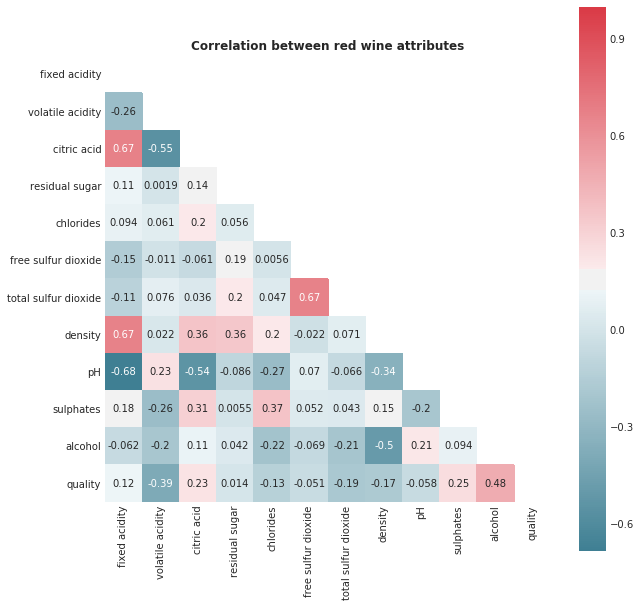

In [6]:
importlib.reload(vs)
fig, ax = vs.plot_heatmap(red_wines.corr())
ax.set_title('Correlation between red wine attributes', 
             fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.show()

Observations from the correlation matrix of red wine attributes:
- pH is almost negatively correlated to every acid content, which was obvious.
- Major takeaway is quality seems to be highly related to and the volatile acid content and the amount of alcohol, former positively and latter negatively correlated.
- Sulphates are slightly responsible for quality assurance here, but they still are one of the most important to maintain quality of wines as per theory.

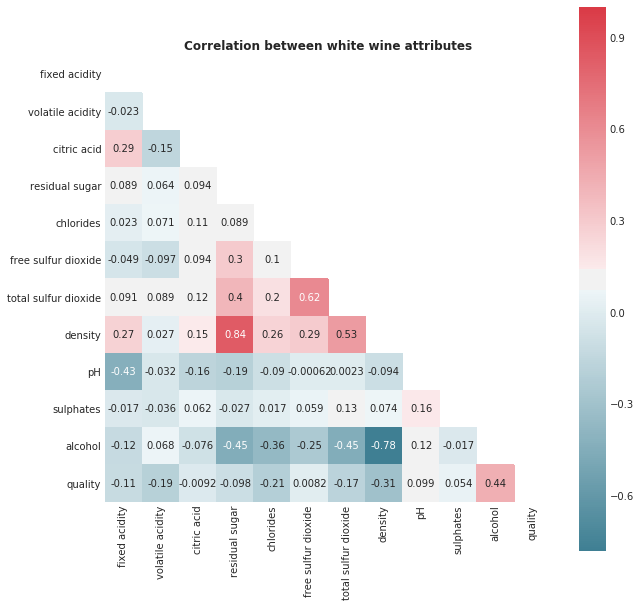

In [7]:
importlib.reload(vs)
fig, ax = vs.plot_heatmap(white_wines.corr())
ax.set_title('Correlation between white wine attributes', 
             fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.show()

Observations from the correlation between white wine attributes:
- Clearly, the residual sugar is highlighted to have the highest correlation with density. This was hoped to seen in red wines too, but was not found.
- Also, total SO2 is also contribute largely in the density of wines.
- Because of these factors, it can be guessed that white wines are quite difficult to preserve, since they must be rotting and thus to save them high amount of SO2 was added and also then to balance the taste residual sugar must have been added.
- More the alcohol, less is the density. This is more clearly visible here than in red wines. Which confirms my intuition of alcohol being related to density. 
- Quality seems to be highly related to the alcohol content here too.

### 1.3. Outlier Detection

Text(0.5,1,'Boxplot of all features of red wine dataset')

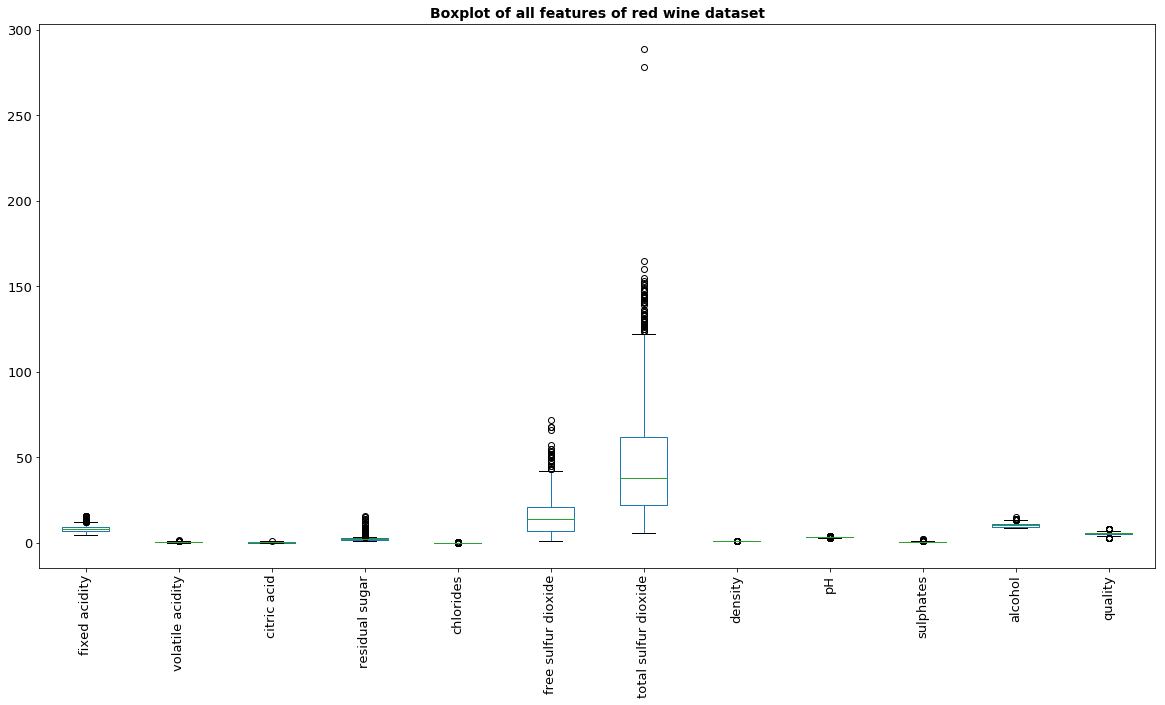

In [8]:
p = red_wines.plot.box(figsize=(20, 10), rot=90, fontsize=13)
p.set_title('Boxplot of all features of red wine dataset', fontdict={'fontsize':14, 'fontweight':'bold'})

Text(0.5,1,'Boxplot of all features of white wine dataset')

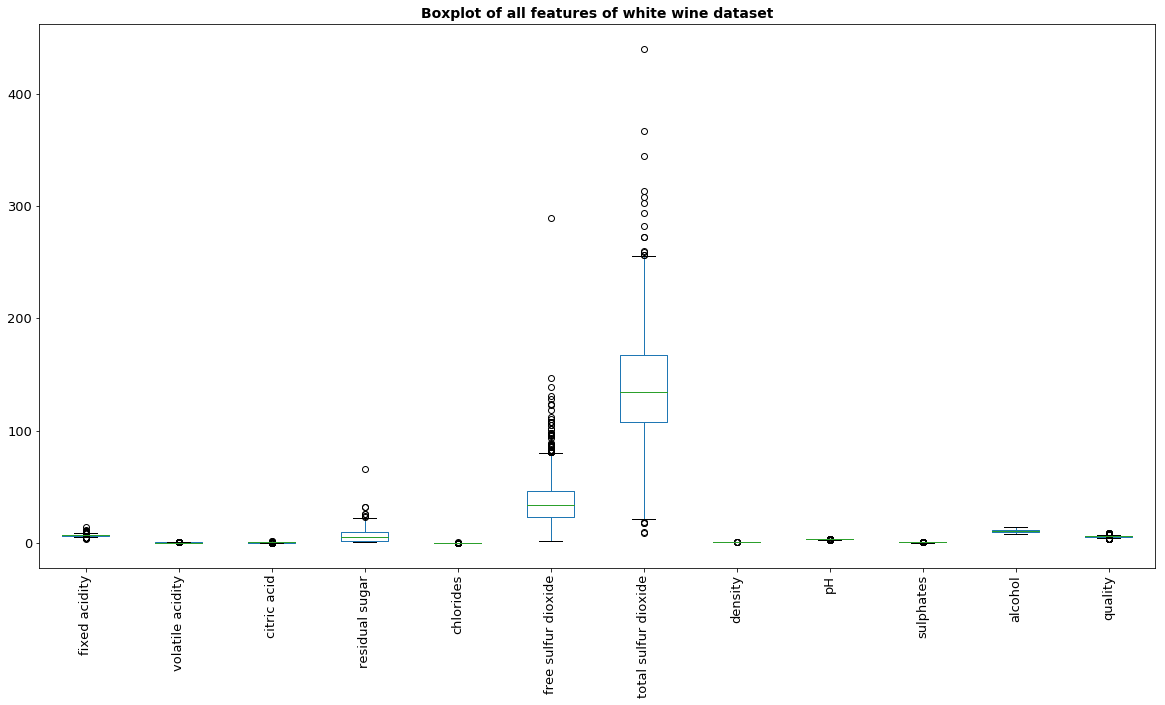

In [9]:
p = white_wines.plot.box(figsize=(20, 10), rot=90, fontsize=13)
p.set_title('Boxplot of all features of white wine dataset', fontdict={'fontsize':14, 'fontweight':'bold'})

As expected, many of the wines (both red and white wines) are having total as well as free SO2 beyond the expected range that most of the wines have. Also, there are few outliers for residual sugars too, which by the guess might have to be added to maintain the tanginess of wines. So, how are these 2 factors different for good and bad quality wines? Let's explore more..

## II. Exploratory Visualization

### 2.1. Input features vs Quality

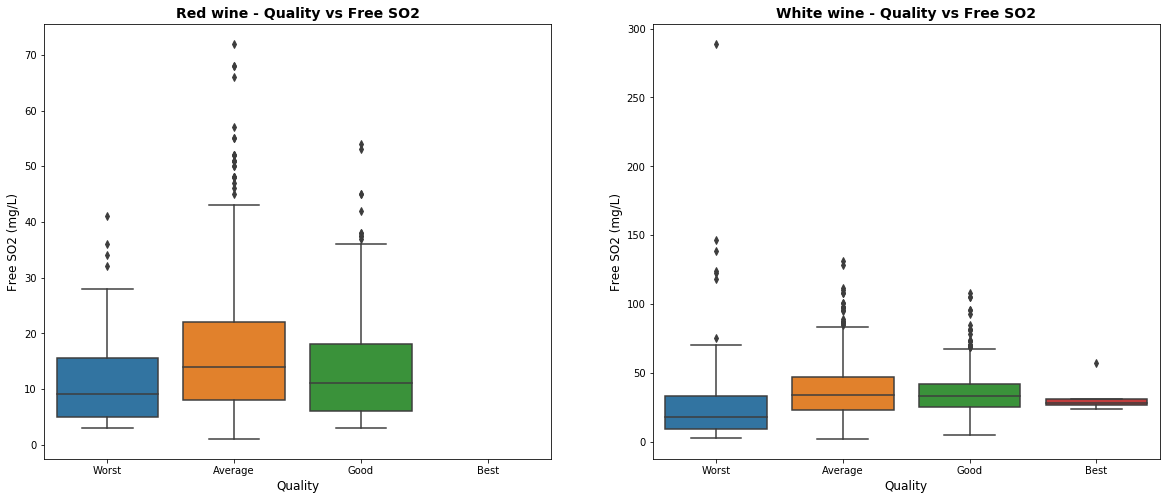

In [10]:
p1, p2 = vs.box_plot(red_wines, white_wines, 'quality bucket', 'free sulfur dioxide')
vs.set_aes(p1,'Red wine - Quality vs Free SO2', 'Quality', 'Free SO2 (mg/L)')
vs.set_aes(p2,'White wine - Quality vs Free SO2', 'Quality', 'Free SO2 (mg/L)')

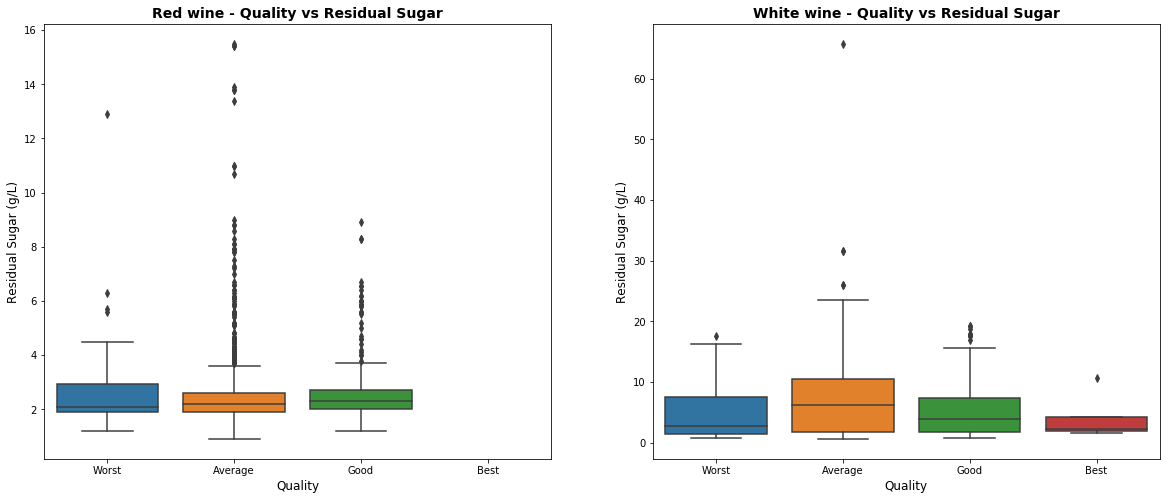

In [11]:
p1, p2 = vs.box_plot(red_wines, white_wines, 'quality bucket', 'residual sugar')
vs.set_aes(p1, 'Red wine - Quality vs Residual Sugar', 'Quality', 'Residual Sugar (g/L)')
vs.set_aes(p2, 'White wine - Quality vs Residual Sugar', 'Quality', 'Residual Sugar (g/L)')

Surprisingly, both free SO2 and residual sugar, not much of the difference can be noted for high and low quality wines. There's one more important factor, which is acidity which accounts for the quality of wine, mainly the volatile acidity. More the volatile acidity, more free SO2 is required to subdue the growth and activity of the acetobacter. Also, 3-6 g/L of volatile acidity (acetic acid) is considered the normal amount.

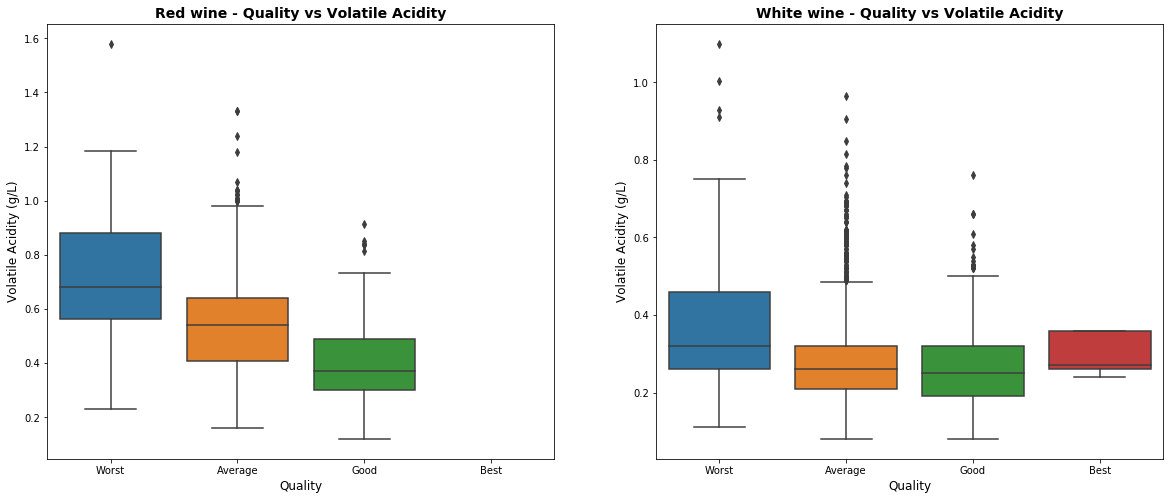

In [12]:
p1, p2 = vs.box_plot(red_wines, white_wines, 'quality bucket', 'volatile acidity')
vs.set_aes(p1, 'Red wine - Quality vs Volatile Acidity', 'Quality', 'Volatile Acidity (g/L)')
vs.set_aes(p2, 'White wine - Quality vs Volatile Acidity', 'Quality', 'Volatile Acidity (g/L)')

Clearly, low quality red wines have volatile acidity beyond the normal bounds, and with increased amount of volatile acidity, the free SO2 is still low in quantity for low quality wines (both red and white). And thus the explanation for the quality of the wines as such.

## III. Algorithms and Techniques

### 3.1. Evaluation metric of different algorithms

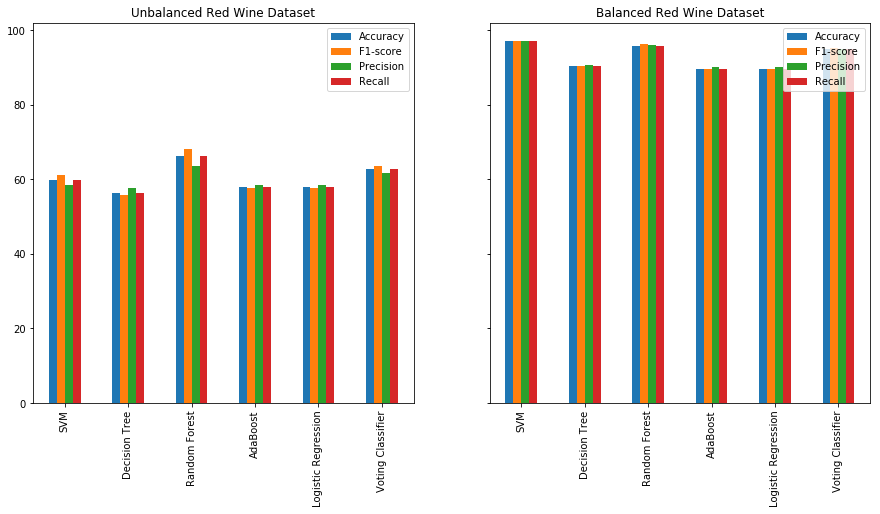

In [184]:
importlib.reload(vs)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7), sharey=True)

df1 = vs.models_prediction(red_wines) *100
df1.plot(kind='bar', ax=ax1, title='Unbalanced Red Wine Dataset')
df2 = vs.models_prediction(red_wines_b) *100
df2.plot(kind='bar', ax=ax2, title='Balanced Red Wine Dataset')

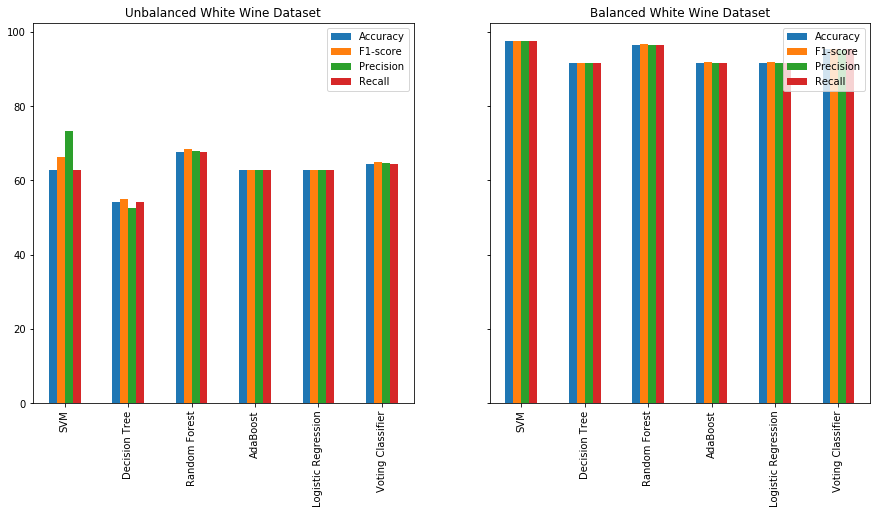

In [188]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7), sharey=True)

df3 = vs.models_prediction(white_wines) *100
df3.plot(kind='bar', ax=ax1, title='Unbalanced White Wine Dataset')
df4 = vs.models_prediction(white_wines_b) *100
df4.plot(kind='bar', ax=ax2, title='Balanced White Wine Dataset')

For both the datsets, SVM gave the best results with approx. 97% accuracy.

## IV. Mathematical Model

The free SO2 content being one of the most important part in the wines, is also dependent on the pH of wines. The free SO2 should be $[(pH-3.0)*100]$ mg/L for red wines; for white wines add 10 to this value. Thus from the formulation, the free SO2 is directly proportional to the free S02 content of wines. pH of about 3.0 to 3.4 is desirable for white wines, while about 3.3 to 3.6 is best for reds.

For red wines, optimal pH range id 3.3-3.6, which implies the optimal free SO2 will be:
- Lower bound = [pH -3.0] * 100 = [3.3 - 3.0] * 100 = 30 mg/L
- Upper bound = [pH -3.0] * 100 = [3.6 - 3.0] * 100 = 60 mg/L

For white wines, optimal pH range id 3.3-3.6, which implies the optimal free SO2 will be:
- Lower bound = [pH -3.0] * 100 = [[3.0 - 3.0] * 100] + 10 = 10 mg/L
- Upper bound = [pH -3.0] * 100 = [[3.4 - 3.0] * 100] + 10 = 50 mg/L

In [306]:
from numpy.polynomial.polynomial import polyfit

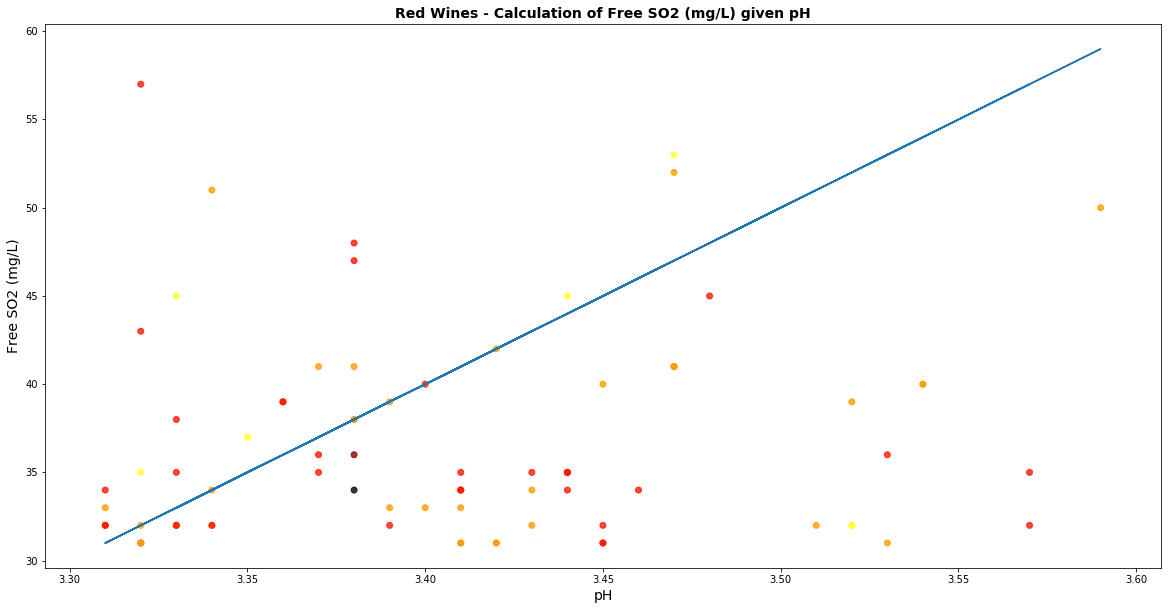

In [318]:
plt.figure(figsize=(20,10))

red_wines_out = red_wines[((red_wines.pH>3.3) & (red_wines.pH<3.6)) \
                         & ((red_wines['free sulfur dioxide']>30) & (red_wines['free sulfur dioxide']<60))]
plt.scatter('pH', 'free sulfur dioxide', c='quality', data=red_wines_out, alpha=.8, cmap='hot')
x = red_wines_out['pH']

# Free SO2 calculation given pH
y = (x - 3.0) * 100
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-')

# Set aesthetics
plt.xlabel('pH', fontdict={'fontsize':14})
plt.ylabel('Free SO2 (mg/L)', fontdict={'fontsize':14})
plt.title('Red Wines - Calculation of Free SO2 (mg/L) given pH', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.show()

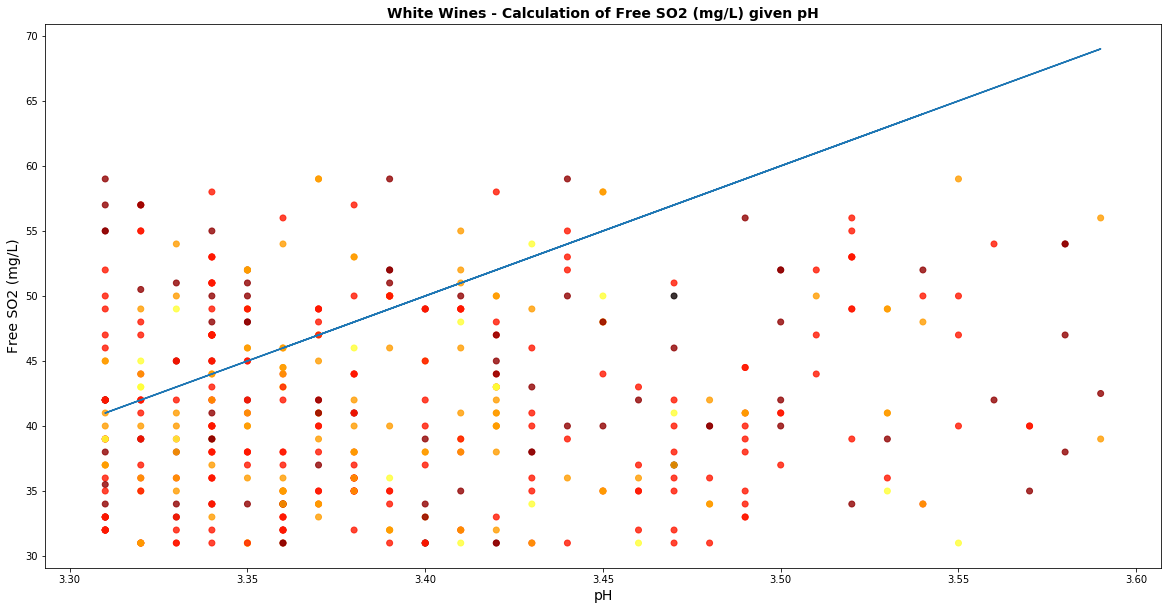

In [319]:
plt.figure(figsize=(20,10))

white_wines_out = white_wines[((white_wines.pH>3.3) & (white_wines.pH<3.6)) \
                         & ((white_wines['free sulfur dioxide']>30) & (white_wines['free sulfur dioxide']<60))]
plt.scatter('pH', 'free sulfur dioxide', c='quality', data=white_wines_out, alpha=.8, cmap='hot')
x = white_wines_out['pH']

# Free SO2 calculation given pH
y = ((x - 3.0) * 100) + 10
b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-')

# Set aesthetics
plt.xlabel('pH', fontdict={'fontsize':14})
plt.ylabel('Free SO2 (mg/L)', fontdict={'fontsize':14})
plt.title('White Wines - Calculation of Free SO2 (mg/L) given pH', fontdict={'fontsize':14, 'fontweight':'bold'})
plt.show()